# Rainbow Charts

http://www.binarytribune.com/forex-trading-indicators/rainbow-charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
# R=red, O=orange, Y=yellow, G=green, B=blue, I = indigo, and V=violet
df['Red'] = df['Adj Close'].rolling(2).mean()
df['Orange'] = df['Red'].rolling(2).mean()
df['Yellow'] = df['Orange'].rolling(2).mean() 
df['Green'] = df['Yellow'].rolling(2).mean()
df['Blue'] = df['Green'].rolling(2).mean()
df['Indigo'] = df['Blue'].rolling(2).mean()
df['Violet'] = df['Indigo'].rolling(2).mean()
df = df.dropna()

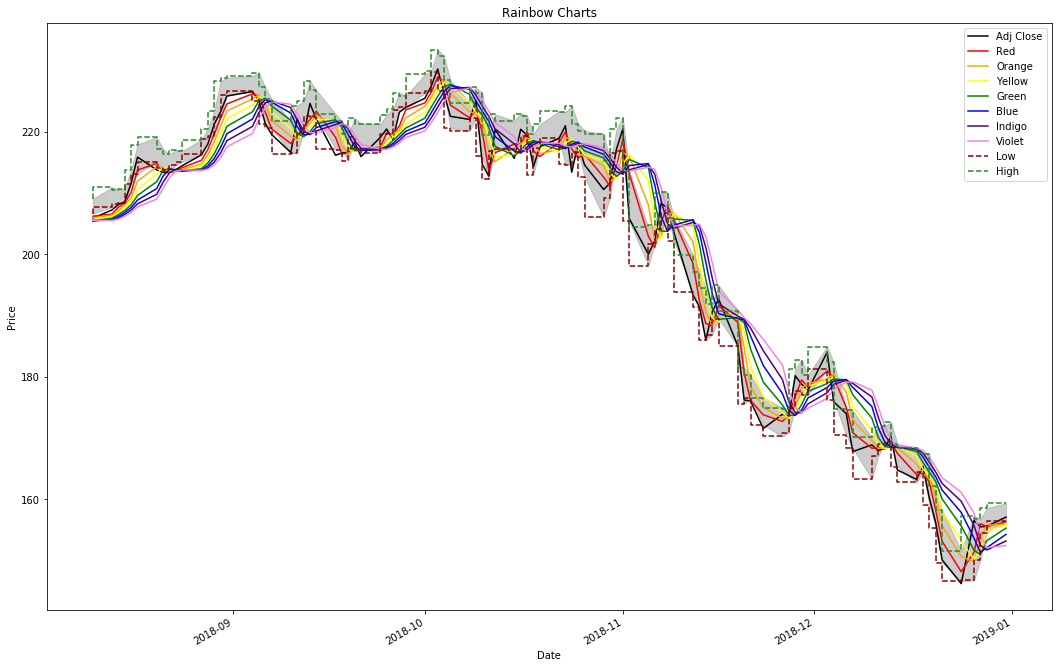

In [4]:
colors = ['k','r', 'orange', 'yellow', 'g', 'b', 'indigo', 'violet']
df[['Adj Close','Red','Orange','Yellow','Green','Blue','Indigo','Violet']].plot(colors=colors, figsize=(18,12))
plt.fill_between(df.index, df['Low'], df['High'], color='grey', alpha=0.4)
plt.plot(df['Low'], c='darkred', linestyle='--', drawstyle="steps")
plt.plot(df['High'], c='forestgreen', linestyle='--', drawstyle="steps")
plt.title('Rainbow Charts')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with Rainbow

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Red,Orange,Yellow,Green,Blue,Indigo,Violet,VolumePositive
0,736916.0,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,206.232834,205.983700,205.640362,205.471784,205.472470,205.544657,205.562055,False
1,736919.0,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,206.590058,206.411446,206.197573,205.918967,205.695376,205.583923,205.564290,False
2,736920.0,210.160004,210.559998,208.259995,209.750000,208.128067,20748000,207.691475,207.140766,206.776106,206.486839,206.202903,205.949140,205.766531,False
3,736921.0,209.220001,210.740005,208.330002,210.240005,208.614273,28807600,208.371170,208.031323,207.586044,207.181075,206.833957,206.518430,206.233785,False
4,736922.0,211.750000,213.809998,211.470001,213.320007,211.670471,28500400,210.142372,209.256771,208.644047,208.115046,207.648060,207.241009,206.879720,False


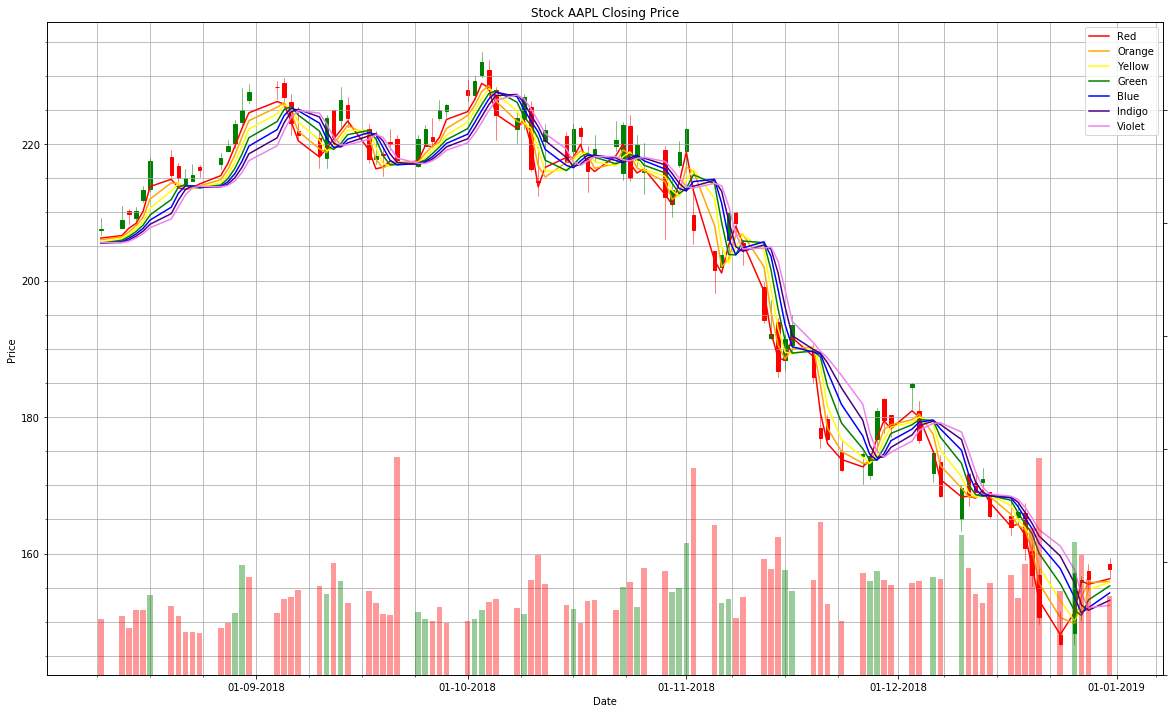

In [8]:
from mpl_finance import candlestick_ohlc

fig, ax1 = plt.subplots(figsize=(20,12))
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
#colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
#labels = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']
for i in dfc[['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']]:
    ax1.plot(dfc['Date'], dfc[i], color=i, label=i)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')